In [105]:
import pandas as pd
import seaborn as cbs
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline

Gathering the data

In [106]:
data_dia=pd.read_csv("diabetes.csv")
data_liver=pd.read_csv("Indian Liver Patient Dataset (ILPD).csv",names=["Age","Gender","TB","DB","Alkphos","Sgpt","Sgot","TP","ALB","A/G Ratio","Outcome"])
data_breast=pd.read_csv("breast-cancer-wisconsin.data.csv",names=["id", "Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Outcome"])



In [107]:
data_dia.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
data_liver.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Outcome
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [109]:
data_breast.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


__Preprocessing to Be done:__<br>
Drop Useless columns such as ID<br>
Convert Outcome of three Datasets to something similar<br>
Drop or Convert Null values<br>
Encode Values<br>
Convert datatype to a usable one(eg. String to Integer)


In [110]:
data_breast=data_breast.drop("id",axis=1)

In [111]:
data_breast["Outcome"]=(data_breast["Outcome"]-2)/2
for i in range(data_liver["Outcome"].size):
    if(data_liver["Outcome"][i]==1):
        data_liver["Outcome"][i]=1
    else:
        data_liver["Outcome"][i]=0

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
print(data_liver[data_liver.isnull().any(axis=1)])
data_liver=data_liver.dropna(axis=0, how='any')

     Age  Gender   TB   DB  Alkphos  Sgpt  Sgot   TP  ALB  A/G Ratio  Outcome
209   45  Female  0.9  0.3      189    23    33  6.6  3.9        NaN        1
241   51    Male  0.8  0.2      230    24    46  6.5  3.1        NaN        1
253   35  Female  0.6  0.2      180    12    15  5.2  2.7        NaN        0
312   27    Male  1.3  0.6      106    25    54  8.5  4.8        NaN        0


In [113]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
data_liver["Gender"]=enc.fit_transform(data_liver["Gender"])

In [114]:
print(data_breast["Bare Nuclei"].unique())
data_breast.groupby("Bare Nuclei").count()

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Outcome
Bare Nuclei,,,,,,,,,
1,402,402,402,402,402,402,402,402,402
10,132,132,132,132,132,132,132,132,132
2,30,30,30,30,30,30,30,30,30
3,28,28,28,28,28,28,28,28,28
4,19,19,19,19,19,19,19,19,19
5,30,30,30,30,30,30,30,30,30
6,4,4,4,4,4,4,4,4,4
7,8,8,8,8,8,8,8,8,8
8,21,21,21,21,21,21,21,21,21


In [115]:
data_breast=data_breast[data_breast["Bare Nuclei"]!="?"]
data_breast["Bare Nuclei"]=pd.to_numeric(data_breast["Bare Nuclei"])

In [116]:
liver_y=np.array(data_liver.Outcome)
diabetes_y=np.array(data_dia.Outcome)
breast_y=np.array(data_breast.Outcome)

data_liver=data_liver.drop("Outcome",axis=1)
data_dia=data_dia.drop("Outcome",axis=1)
data_breast=data_breast.drop("Outcome",axis=1)

data=[data_liver,data_dia,data_breast]
target=[liver_y,diabetes_y,breast_y]

__Using PCA for Dimensionality Reduction__

In [117]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
def plot_pca(x,target):
    pca_data=pca.fit_transform(x)
    for i in range(target.size):
        if target[i]==0:
            plt.plot(pca_data[i,0],pca_data[i,1],'bo')
        else:
            plt.plot(pca_data[i,0],pca_data[i,1],'ro')
    plt.show()

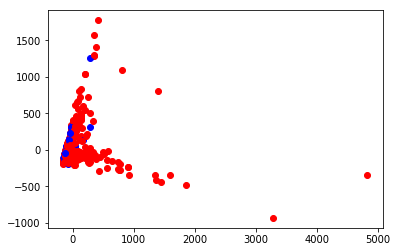

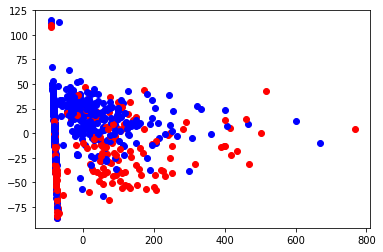

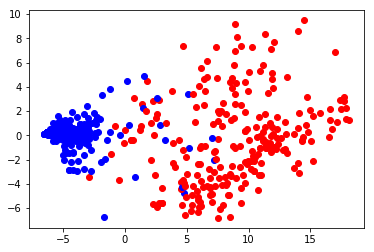

In [118]:
for i in range(3):
    plot_pca(data[i],target[i])

<br><br>__Creating the Model__<br>
We will be comparing multiple models here to check which gives us the highest accuracy

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
names = ["Nearest Neighbors","Logistic Regression", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]
data_names=["Liver Disorder","Diabetes","Breast Cancer"]
classifiers = [
    KNeighborsClassifier(10),
    LogisticRegression(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),                     
    DecisionTreeClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    ]

In [99]:
for j in range(3):
    print(data_names[j])
    for i in list(range(len(classifiers))):
        X_train,X_test,y_train,y_test=train_test_split(data[j],target[j],test_size=.25,random_state=42)
        clf=classifiers[i]
        clf.fit(X_train,y_train)
        y_pred=clf.predict(X_test)
        conf=confusion_matrix(y_test,y_pred)
        TPR=conf[1][1]/(conf[1][1]+conf[1][0])
        SPC=conf[1][1]/(conf[1][1]+conf[0][1])
        print("For ",names[i]," accuracy is ",accuracy_score(y_pred,y_test),"TPR=",TPR,"SPC",SPC)

Liver Disorder
For  Nearest Neighbors  accuracy is  0.6275862068965518 TPR= 0.8064516129032258 SPC 0.6756756756756757
For  Logistic Regression  accuracy is  0.6344827586206897 TPR= 0.978494623655914 SPC 0.6408450704225352
For  Linear SVM  accuracy is  0.6413793103448275 TPR= 1.0 SPC 0.6413793103448275
For  RBF SVM  accuracy is  0.6482758620689655 TPR= 1.0 SPC 0.6458333333333334
For  Decision Tree  accuracy is  0.6620689655172414 TPR= 0.8387096774193549 SPC 0.6964285714285714
For  Random Forest  accuracy is  0.6344827586206897 TPR= 0.9354838709677419 SPC 0.6492537313432836
For  Neural Net  accuracy is  0.6413793103448275 TPR= 1.0 SPC 0.6413793103448275
For  AdaBoost  accuracy is  0.6620689655172414 TPR= 0.8279569892473119 SPC 0.7
For  Naive Bayes  accuracy is  0.6 TPR= 0.3978494623655914 SPC 0.9487179487179487
Diabetes
For  Nearest Neighbors  accuracy is  0.71875 TPR= 0.5072463768115942 SPC 0.6363636363636364
For  Logistic Regression  accuracy is  0.7447916666666666 TPR= 0.6231884057971

C:\Users\rollaball\Miniconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in longlong_scalars
  # Remove the CWD from sys.path while we load stuff.


For  Neural Net  accuracy is  0.671875 TPR= 0.42028985507246375 SPC 0.5576923076923077
For  AdaBoost  accuracy is  0.7239583333333334 TPR= 0.6231884057971014 SPC 0.6142857142857143
For  Naive Bayes  accuracy is  0.734375 TPR= 0.6811594202898551 SPC 0.618421052631579
Breast Cancer
For  Nearest Neighbors  accuracy is  0.9473684210526315 TPR= 0.8823529411764706 SPC 0.9836065573770492
For  Logistic Regression  accuracy is  0.9473684210526315 TPR= 0.8823529411764706 SPC 0.9836065573770492
For  Linear SVM  accuracy is  0.9532163742690059 TPR= 0.8970588235294118 SPC 0.9838709677419355
For  RBF SVM  accuracy is  0.9649122807017544 TPR= 0.9852941176470589 SPC 0.9305555555555556
For  Decision Tree  accuracy is  0.9532163742690059 TPR= 0.9117647058823529 SPC 0.96875
For  Random Forest  accuracy is  0.9590643274853801 TPR= 0.9117647058823529 SPC 0.9841269841269841
For  Neural Net  accuracy is  0.9473684210526315 TPR= 0.8823529411764706 SPC 0.9836065573770492
For  AdaBoost  accuracy is  0.947368421

__Evaluating Models:__<br>
Let us try to Evaluate the models using ROC curve<br> 
ROC curve illustrates the ability of a binary classifier system<br>
So here we plot the TPR and FPR at various thresholds and form a curve<br>
If the area under the curve is above .5 then our classifers works better than a random predictor<br>
The highers the area the better<br>

In [58]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
def plot_roc(x,y,clf,name):
    X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)
    clf.fit(X_train,y_train.reshape(-1,1))
    prob=clf.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(y_test.reshape(-1,1), prob[:,1])
    #plt.figure()
    plt.plot(fpr,tpr)
    plt.plot(fpr, tpr, color='red',label='Area Under Curve %0.2f' % auc(fpr,tpr))
    plt.plot([0,1],[0,1],color='blue',linestyle='--')
    for i in range(len(thresholds)):
        if thresholds[i]==0.5:
            plt.plot(fpr[i],tpr[i],"bo")
    plt.xlim([0.02,1.02])
    plt.ylim([0.01,1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc="lower right")
    plt.show()

C:\Users\rollaball\Miniconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


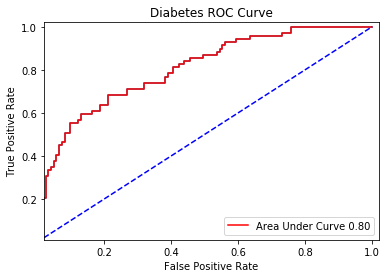

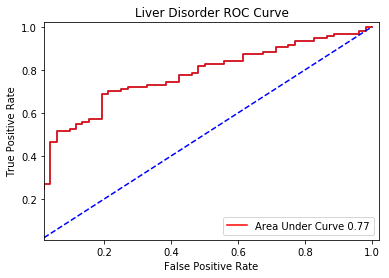

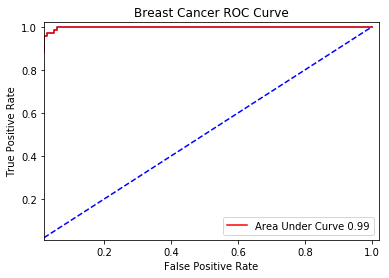

In [59]:
plot_roc(data_dia,diabetes_y,LogisticRegression(),"Diabetes ROC Curve")
plot_roc(data_liver,liver_y,LogisticRegression(),"Liver Disorder ROC Curve")
plot_roc(data_breast,breast_y,GaussianProcessClassifier(),"Breast Cancer ROC Curve")

__Deep Learning__<br>
Now let us try to classify using a deep learning model<br>
Our First model has a 0 hidden layer and 2 nodes output layers to Predict weather the patient suffers from the disease<br>
While the second model has 3 Hidden layers with variable nodes<br>

In [70]:
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
def single_layer(x,y,z):
    oenc=OneHotEncoder()
    d=oenc.fit_transform(y.reshape(-1, 1))
    d=np.array(d.todense())
    X_train,X_test,y_train,y_test=train_test_split(x,d,test_size=.25,random_state=42)
    X_tf=tf.placeholder(tf.float32,[None,x.shape[1]])
    y_tf=tf.placeholder(tf.float32,[None,d.shape[1]])
    W=tf.Variable(tf.zeros([x.shape[1],d.shape[1]]))
    b=tf.Variable(tf.zeros([d.shape[1]]))
    y_=tf.nn.softmax(tf.matmul(X_tf,W)+b)
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
    train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for _ in range(100):
        sess.run(train_step, feed_dict={X_tf: np.array(X_train), y_tf: y_train})
    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(z,sess.run(accuracy, feed_dict={X_tf: X_test, y_tf: y_test}))

In [102]:
print("Accuracy for Single layer Neural Net:")
for i in range(3):
    single_layer(data[i],target[i],data_names[i])

Accuracy for Single layer Neural Net:
Liver Disorder 0.3586207
Diabetes 0.640625
Breast Cancer 0.6023392


In [103]:
def multi_layer(x,y,z):
    oenc=OneHotEncoder()
    d=oenc.fit_transform(y.reshape(-1, 1))
    d=np.array(d.todense())
    
    X_train,X_test,y_train,y_test=train_test_split(x,d,test_size=.25,random_state=42)
    
    X_tf=tf.placeholder(tf.float32,[None,x.shape[1]])
    y_tf=tf.placeholder(tf.float32,[None,d.shape[1]])
    
    l1_nodes=100
    l2_nodes=100
    l3_nodes=100
    
    hidden_layer_1={'weights':tf.Variable(tf.random_normal([x.shape[1],l1_nodes])),'bias':tf.Variable(tf.random_normal([l1_nodes]))}
    hidden_layer_2={'weights':tf.Variable(tf.random_normal([l1_nodes,l2_nodes])),'bias':tf.Variable(tf.random_normal([l2_nodes]))}
    hidden_layer_3={'weights':tf.Variable(tf.random_normal([l2_nodes,l3_nodes])),'bias':tf.Variable(tf.random_normal([l3_nodes]))}
    output_layer={'weights':tf.Variable(tf.random_normal([l3_nodes,d.shape[1]])),'bias':tf.Variable(tf.random_normal([d.shape[1]]))}
    
    l1=tf.add(tf.matmul(X_tf,hidden_layer_1['weights']),hidden_layer_1['bias'])
    l1=tf.nn.relu(l1)
    l2=tf.add(tf.matmul(l1,hidden_layer_2['weights']),hidden_layer_2['bias'])
    l2=tf.nn.relu(l2)
    l3=tf.add(tf.matmul(l2,hidden_layer_3['weights']),hidden_layer_3['bias'])
    l3=tf.nn.relu(l3)
    output=tf.add(tf.matmul(l1,output_layer['weights']),output_layer['bias'])

    cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output,labels=y_tf))
    y_=tf.nn.softmax(output)
    cross_entropy=tf.reduce_mean(-tf.reduce_sum(y_tf * tf.log(y_), reduction_indices=[1]))
    optimizer=tf.train.AdamOptimizer().minimize(cost)
    #optimizer=tf.train.AdamOptimizer().minimize(cost)
    sess=tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    for _ in range(1000):
        sess.run(optimizer, feed_dict={X_tf: X_train, y_tf:y_train})

    correct_prediction = tf.equal(tf.argmax(y_tf,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print(z,sess.run(accuracy, feed_dict={X_tf: X_test, y_tf: y_test}))

In [104]:
print("Accuracy for multi layer neural net")
for i in range(3):
    multi_layer(data[i],target[i],data_names[i])

Accuracy for multi layer neural net
Liver Disorder 0.57931036
Diabetes 0.6197917
Breast Cancer 0.91812867


(768,)